### The perceptron

A simple implementation of a perceptron learning algorithm

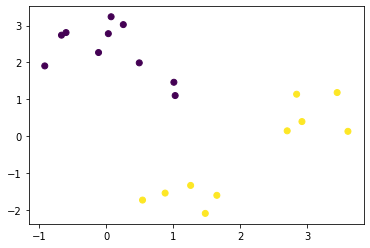

In [1]:
import random
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# training data
random.seed(42)
X, y = make_classification(n_samples=20, 
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=random.randint(0,1000), 
                           n_clusters_per_class=1, 
                           class_sep=1.31)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
n = np.shape(X)[0] # number of data points
y[y==0] = -1


# Plotting of the training data
%matplotlib inline
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [2]:
def loss(X,y,w,b):
  loss = 0
  for ys,xs in zip(y,X): #some python show off
    loss += max(0, -ys * (np.dot(xs, w) + b))
  return loss

### Calculating the gradient by hand

Only visit wrongly classified points. Take gradient wrt w and b extra.

$$
    \frac{\partial l}{w} = -y \cdot w
$$
$$
    \frac{\partial l}{b} = -y 
$$

The gradient descent update formula becomes:

In [3]:
def update_params(X,y,w,b):
  didUpdate = False
  for ys,xs in zip(y,X): #some python show off
    if (ys * (np.dot(xs, w) + b) < 0):
      w = w + ys*xs#eta = 1 
      b = b + ys*1
      didUpdate = True
  return w,b, didUpdate

In [4]:
def plot_data_line(X,y,w,b):
  fig = plt.figure()
  ax = plt.axes()
  xh = np.linspace(min(X[:,0]), max(X[:,0]),10)
  yh = -w[0]/w[1]*xh - b/w[1]
  ax.plot(xh, yh)
  ax.scatter(X[:, 0], X[:, 1], c=y)
  plt.title("Loss {}".format(loss(X,y,w,b)))
  plt.xlim(min(X[:,0]) -1 , max(X[:,0]))
  plt.ylim(min(X[:,1]) -1,  max(X[:,1]) + 1)
  plt.show()

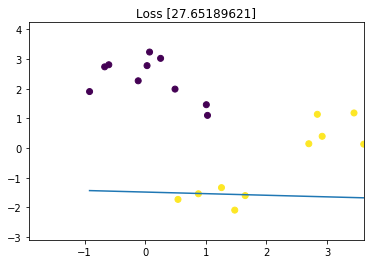

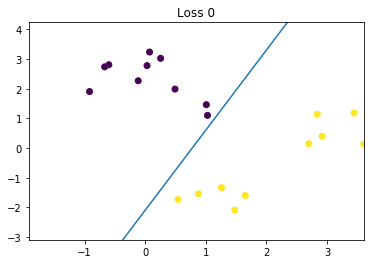

No Update, finished


In [5]:
w = 2*np.random.randn((X.shape[1]))
b = 10*np.random.randn(1)
plot_data_line(X,y,w,b)
for i in range(100):
  w,b,did = update_params(X,y,w,b)
  if did == False:
    print("No Update, finished")
    break
  plot_data_line(X,y,w,b)